In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
##confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
df_EMG = pd.read_csv('/content/Project_Data_EE4C12_S&S_EMG.csv')

In [ ]:
print(df_EMG.head())
print(df_EMG.shape)
print("\nempty values:",df_EMG.isnull().any().sum())

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)

empty values: 0


In [ ]:
print("class :", df_EMG["class"].unique())
print()
print("Labels :",df_EMG["label"].unique())
#print()
print("Value Count :\n",df_EMG["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [ ]:
##Drop class 0 and 7
df_EMG = df_EMG[df_EMG["class"] != 0]
df_EMG = df_EMG[df_EMG["class"] != 7]

In [ ]:
features = df_EMG.drop(columns = ["class","label", "time"])
display(features.head())


,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002


In [ ]:
Cl = df_EMG["class"]
print(Cl.unique())

[1 2 3 4 5 6]


In [ ]:
print(type(Cl))
print(type(features))

Class = Cl.values
features = features.values

print(type(Cl))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=42)

In [ ]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1199243, 8)
x_test shape (299811, 8)
y_train shape (1199243,)
y_test shape (299811,)


In [ ]:
X_train = X_train - np.mean(X_train)
X_train = X_train / np.std(X_train)

X_test = X_test - np.mean(X_test)
X_test = X_test / np.std(X_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train - 1, num_classes = 6)
y_test = tf.keras.utils.to_categorical(y_test - 1, num_classes=6)


In [ ]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1199243, 8)
x_test shape (299811, 8)
y_train shape (1199243, 6)
y_test shape (299811, 6)


In [ ]:
def plot(loss, val_loss, acc, val_acc):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
batch_size = 128
epochs = 200
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test.reshape(X_test.shape[0], 8, 1), y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.6474 - loss: 0.9053 - val_accuracy: 0.6841 - val_loss: 0.8082
Epoch 2/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.6860 - loss: 0.8010 - val_accuracy: 0.6961 - val_loss: 0.7744
Epoch 3/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.6970 - loss: 0.7719 - val_accuracy: 0.7051 - val_loss: 0.7513
Epoch 4/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.7085 - loss: 0.7438 - val_accuracy: 0.7138 - val_loss: 0.7284
Epoch 5/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.7174 - loss: 0.7213 - val_accuracy: 0.7188 - val_loss: 0.7141
Epoch 6/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.7271 - loss: 0.6992 - val_accuracy: 0.7292 - val_loss: 0.6955
Epoch 7/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.7341 - loss: 0.6836 - val_accuracy: 0.7339 - val_loss: 0.6811
Epoch 8/200
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.7408 -

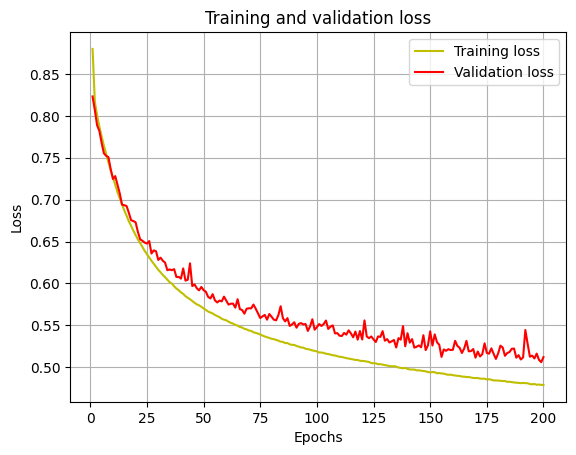

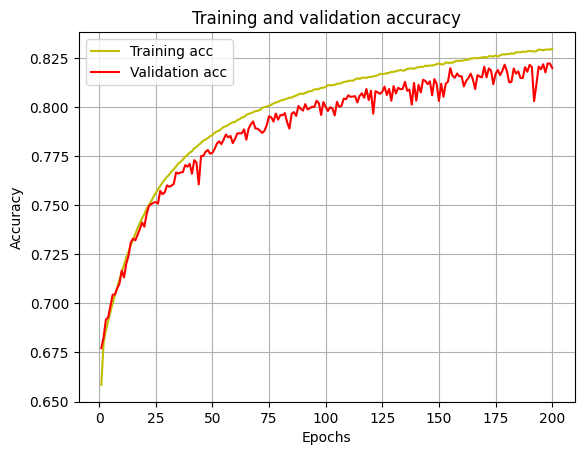

In [ ]:
plot(loss, val_loss, acc, val_acc)

In [ ]:
##Code using LSTM
model_LSTM = Sequential()
model_LSTM.add(layers.LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_LSTM.add(layers.Dropout(0.2))
model_LSTM.add(layers.LSTM(64))
model_LSTM.add(layers.Dropout(0.2))
model_LSTM.add(layers.Dense(6, activation='softmax'))

model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
batch_size = 128
epochs = 100
history = model_LSTM.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test.reshape(X_test.shape[0], 8, 1), y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Epoch 1/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 348s 37ms/step - accuracy: 0.5875 - loss: 1.0418 - val_accuracy: 0.6816 - val_loss: 0.8133
Epoch 2/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 344s 37ms/step - accuracy: 0.6772 - loss: 0.8288 - val_accuracy: 0.6937 - val_loss: 0.7811
Epoch 3/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 362s 35ms/step - accuracy: 0.6875 - loss: 0.8037 - val_accuracy: 0.7047 - val_loss: 0.7557
Epoch 4/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 386s 35ms/step - accuracy: 0.6948 - loss: 0.7825 - val_accuracy: 0.7125 - val_loss: 0.7356
Epoch 5/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 343s 37ms/step - accuracy: 0.7028 - loss: 0.7644 - val_accuracy: 0.7220 - val_loss: 0.7157
Epoch 6/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 360s 38ms/step - accuracy: 0.7099 - loss: 0.7459 - val_accuracy: 0.7320 - val_loss: 0.6914
Epoch 7/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 343s 37ms/step - accuracy: 0.7156 - loss: 0.7323 - val_accuracy: 0.7389 - val_loss: 0.6737
Epoch 8/100
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 383s 37ms/step - ac

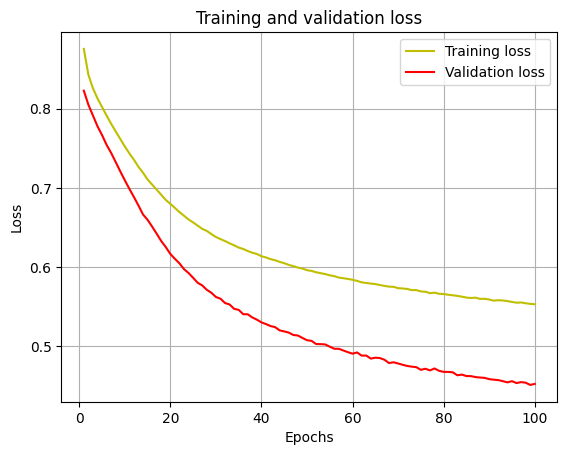

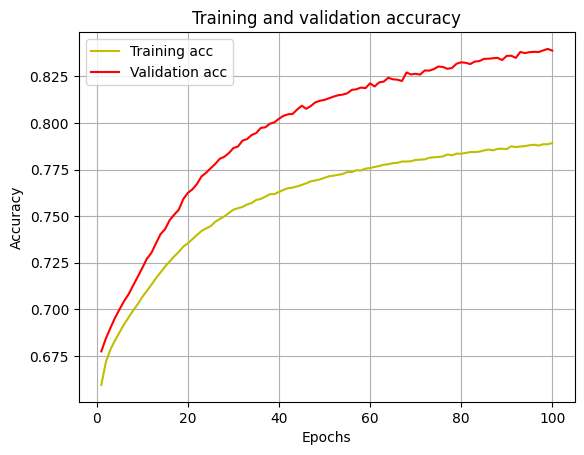

In [ ]:
plot(loss, val_loss, acc, val_acc)